In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap
import os
import seaborn as sb
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [3]:
df = gpd.read_file('test.geojson')
poly = df.geometry[5]

In [4]:
waypoints = pd.read_csv('path_Waypoints22feb.csv')
wps = waypoints[['NAME', 'LAT','LON']]
wps.head()

,NAME,LAT,LON
0,PT222,3.726111,107.315556
1,MABLI,4.287778,106.212778
2,SUSAR,3.979722,105.262778
3,WP002,2.387778,103.871944
4,DAMOG,4.206944,105.003889


In [5]:
wps1 = wps[wps['NAME'].isin(['PT222','LUSMO','ONAPO','LEBIN','LIPRO','WP071','WP002'])]
t1 = pd.DataFrame({'NAME':['PT222','LUSMO','ONAPO','LEBIN','LIPRO','WP071','WP002']})

wps2 = wps[wps['NAME'].isin(['OMBAP','BUNTO','LIPRO','KILOT','OTLON','WP061'])]
t2 = pd.DataFrame({'NAME':['OMBAP','BUNTO','LIPRO','KILOT','OTLON','WP061']})

wps3 = wps[wps['NAME'].isin(['PT111','MABLI','MUMSO','MABAL','KILOT','PEKLA'])]
t3 = pd.DataFrame({'NAME':['PT111','MABLI','MUMSO','MABAL','KILOT','PEKLA']})

wps4 = wps[wps['NAME'].isin(['PT222','LUSMO','OPULA','ELGOR','MABAL','VISAT','WP059'])]
t4 =   pd.DataFrame({'NAME':['PT222','LUSMO','OPULA','ELGOR','MABAL','VISAT','WP059']})

wps5 = wps[wps['NAME'].isin(['DAMOG','SUSAR','MUMSO','ELGOR','LEBIN','OMLIV','BOBOB'])]
t5 =   pd.DataFrame({'NAME':['DAMOG','SUSAR','MUMSO','ELGOR','LEBIN','OMLIV','BOBOB']})

wps6 = wps[wps['NAME'].isin(['PT111','MABLI','OPULA','ONAPO','OMLIV','OMBAP'])]
t6 = pd.DataFrame({'NAME':['PT111','MABLI','OPULA','ONAPO','OMLIV','OMBAP']})

pws7 = wps[wps['NAME'].isin(['PT222','LUSMO','ONAPO','LEBIN','LIPRO','WP071','WP002'])]
t7 = pd.DataFrame({'NAME':['PT222','LUSMO','ONAPO','LEBIN','LIPRO','WP071','WP002']})

wps_1 = t1.merge(wps, on  = 'NAME')
wps_2 = t2.merge(wps, on = 'NAME')
wps_3 = t3.merge(wps, on = 'NAME')
wps_4 = t4.merge(wps, on = 'NAME')
wps_5 = t5.merge(wps, on = 'NAME')
wps_6 = t6.merge(wps, on = 'NAME')
wps_7 = t7.merge(wps, on = 'NAME')

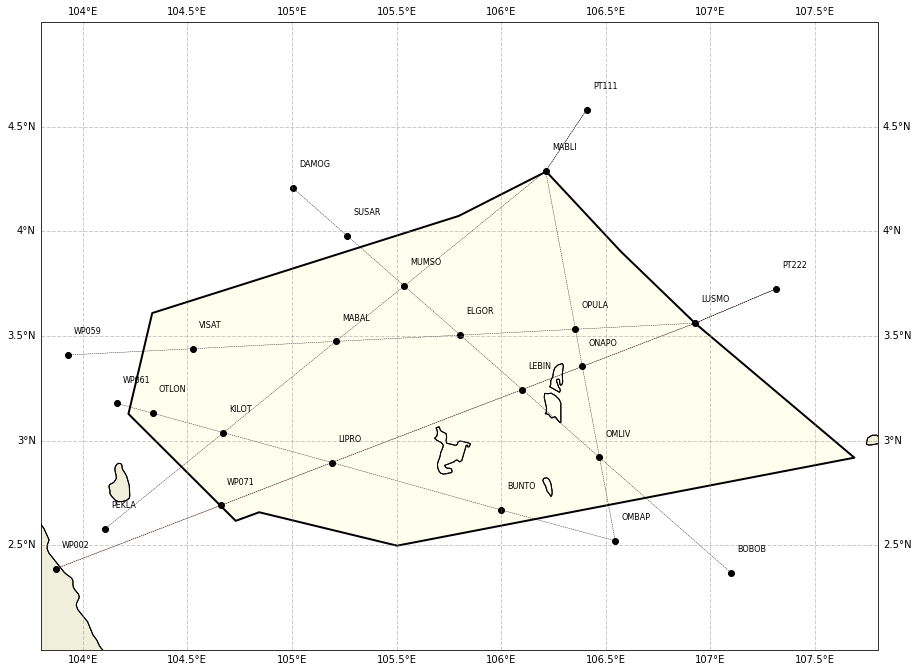

In [8]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_geometries([poly], crs =ccrs.PlateCarree(), alpha = 1, edgecolor='black', facecolor ='ivory', linewidth=2)
ax.coastlines()

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

ax.set_extent([103.8,107.8,2,5], crs =ccrs.PlateCarree())
ax.plot(wps_1['LON'], wps_1['LAT'],color ='brown', linewidth = 0.4, linestyle = 'dashed')
ax.plot(wps_2['LON'], wps_2['LAT'],color ='black', linewidth = 0.4, linestyle = 'dashed')
ax.plot(wps_3['LON'], wps_3['LAT'],color ='black', linewidth = 0.4, linestyle = 'dashed')
ax.plot(wps_4['LON'], wps_4['LAT'],color ='black', linewidth = 0.4, linestyle = 'dashed')
ax.plot(wps_5['LON'], wps_5['LAT'],color ='black', linewidth = 0.4, linestyle = 'dashed')
ax.plot(wps_6['LON'], wps_6['LAT'],color ='black', linewidth = 0.4, linestyle = 'dashed')
ax.plot(wps_7['LON'], wps_7['LAT'],color ='black', linewidth = 0.4, linestyle = 'dashed')
ax.scatter(wps['LON'], wps['LAT'], color = 'black')
for i, txt in enumerate(wps['NAME']):
    ax.annotate(txt, (wps.iloc[i]['LON']+0.03, wps.iloc[i]['LAT']+0.1), fontsize = 8)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.4, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# plt.show()
plt.savefig('map.jpg', dpi= 900,  bbox_inches='tight')